<a href="https://colab.research.google.com/github/Shivam4681/Handwritten-Digit-Image-Classification/blob/main/Handwritten_digit_Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Handwritten Digit Classification Project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')


Load MNIST dataset

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

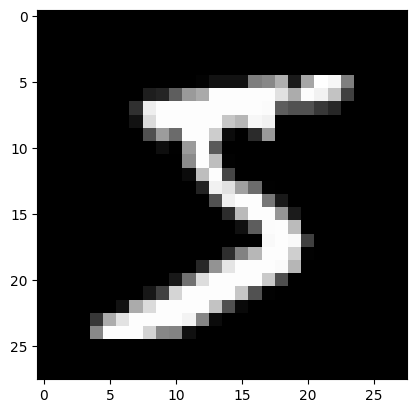

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')

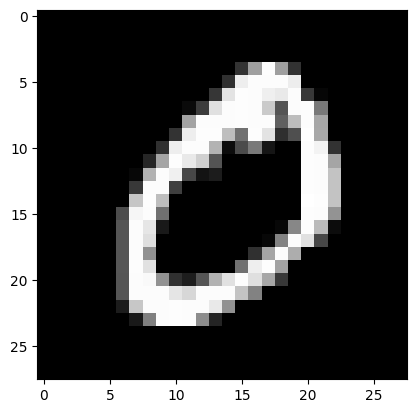

In [7]:
plt.imshow(x_train[1], cmap='gray')

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

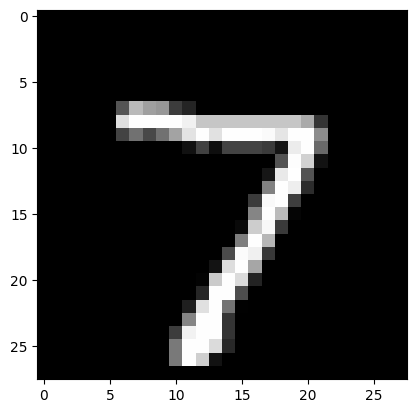

In [10]:
plt.imshow(x_test[0], cmap='gray')

Displaying first 9 images from train data

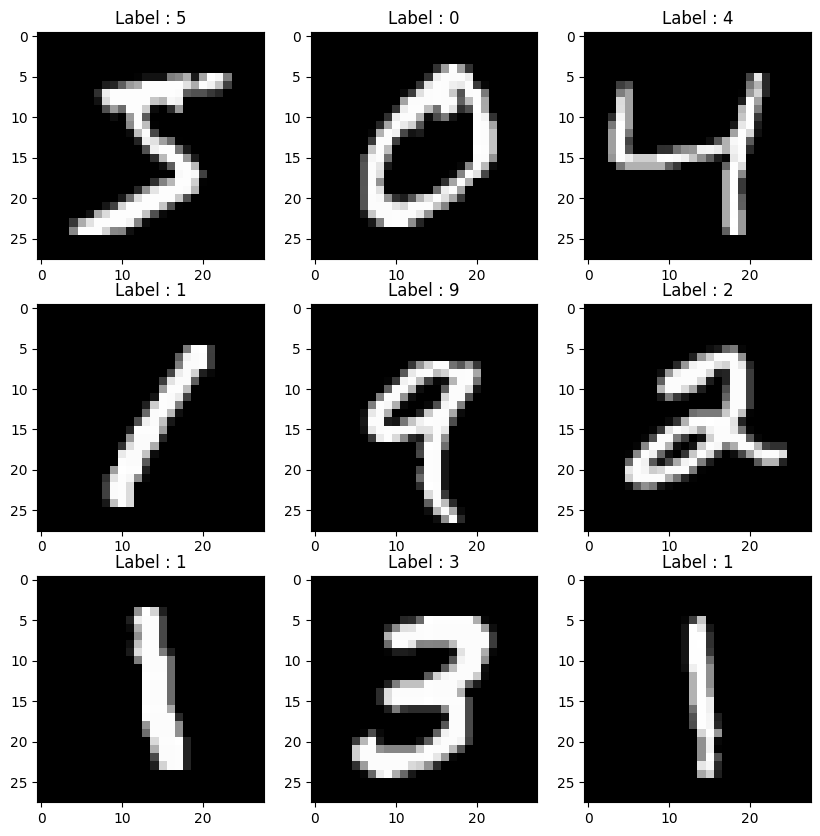

In [11]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f'Label : {y_train[i]}')

In [12]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
len(np.unique(y_train))

10

.


**Preprocess image data**

In [14]:
xtrain_scl = x_train.astype('float32')/255
xtest_scl = x_test.astype('float32')/255

In [15]:
xtrain_scl

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [16]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    


**Onehot encode the y features**

In [17]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(y_train)
ytest_cat = to_categorical(y_test)

In [18]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [20]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

.

**Build the neural network**

Simple Covnet architecture

In [22]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [23]:
model = Sequential()

# Add Input Layer
model.add(Input(shape=(28, 28, 1)))

# Add Convolutional Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# Add MaxPooling Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Convolutional Layer 2
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# Add Maxpooling Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Flatten Layer
model.add(Flatten())

# Add Droupout Layer
model.add(Dropout(0.5))

# Add Output Layer
model.add(Dense(ytrain_cat.shape[1], activation='softmax'))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dropout (Dropout)           (None, 800)               0

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
hist = model.fit(xtrain_scl, ytrain_cat, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 19s 7ms/step - loss: 0.3103 - accuracy: 0.9032 - val_loss: 0.0710 - val_accuracy: 0.9817
Epoch 2/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1177 - accuracy: 0.9635 - val_loss: 0.0526 - val_accuracy: 0.9860
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0935 - accuracy: 0.9712 - val_loss: 0.0453 - val_accuracy: 0.9873
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0819 - accuracy: 0.9745 - val_loss: 0.0431 - val_accuracy: 0.9875
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0741 - accuracy: 0.9776 - val_loss: 0.0390 - val_accuracy: 0.9888
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0682 - accuracy: 0.9785 - val_loss: 0.0345 - val_accuracy: 0.9910
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0641 - accuracy: 0.9793 - val_loss: 0.0316 - val_accuracy


**Plot the learning curve**

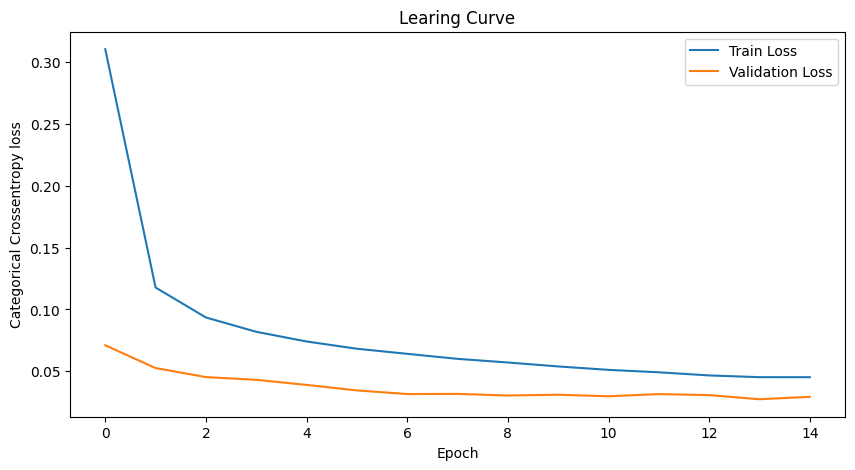

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Learing Curve')
plt.ylabel('Categorical Crossentropy loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Evaluate the model in train and test

In [28]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0181 - accuracy: 0.9946


[0.018062610179185867, 0.9946333169937134]

In [29]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0258 - accuracy: 0.9916


[0.025778690353035927, 0.991599977016449]

Predict results for train and test


In [30]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [31]:
yprob_train[0:5]

array([[4.28185626e-10, 3.10267312e-10, 2.65534993e-07, 1.52484160e-02,
        5.89569680e-13, 9.84744608e-01, 5.80378134e-10, 5.39526752e-08,
        5.33911225e-06, 1.31527668e-06],
       [9.99993086e-01, 4.22432402e-12, 4.51511050e-06, 1.53734511e-10,
        1.49088901e-08, 7.08836057e-09, 1.82350243e-06, 1.09452662e-10,
        5.13366061e-08, 5.19756668e-07],
       [1.79928392e-13, 1.95965786e-08, 2.03435864e-08, 5.52624023e-11,
        9.99994874e-01, 2.38235733e-11, 6.99276401e-12, 3.05817480e-06,
        1.84326119e-08, 1.98414796e-06],
       [1.61781006e-08, 9.99973536e-01, 3.54066003e-07, 4.97394181e-10,
        2.10120961e-05, 1.01434408e-08, 8.73787354e-09, 4.63183142e-06,
        4.40384355e-07, 4.50851623e-08],
       [1.08594606e-10, 1.41947587e-09, 5.32038813e-09, 2.73262355e-08,
        5.29474870e-04, 1.67404579e-08, 4.91812580e-12, 8.28729844e-06,
        3.79946832e-05, 9.99424219e-01]], dtype=float32)

In [32]:
yprob_test[0:5]

array([[8.5489160e-10, 3.1004019e-10, 2.7403571e-06, 6.3112543e-07,
        6.2293183e-13, 8.2299688e-12, 4.2704675e-19, 9.9999654e-01,
        1.5507984e-09, 1.4853742e-07],
       [3.1970678e-06, 2.1909109e-05, 9.9997234e-01, 6.4370155e-08,
        1.6004583e-08, 2.7208353e-12, 1.1320973e-06, 1.0478647e-10,
        1.2043403e-06, 1.6178017e-12],
       [9.6169003e-08, 9.9990761e-01, 3.9587954e-07, 5.0436622e-08,
        7.9052057e-05, 1.3788140e-07, 1.3693489e-07, 1.1034994e-05,
        1.0582521e-06, 3.8332360e-07],
       [9.9975067e-01, 5.6187655e-13, 2.2832960e-06, 1.1188817e-08,
        7.4274212e-08, 8.7972671e-07, 2.4208562e-04, 9.2967918e-09,
        1.5606614e-06, 2.4333808e-06],
       [3.5221662e-11, 1.5303408e-11, 1.2473316e-09, 7.3739383e-12,
        9.9999523e-01, 8.2567862e-11, 2.1332380e-09, 7.9032780e-10,
        4.7699520e-09, 4.7166404e-06]], dtype=float32)

In [33]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [34]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [35]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [36]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [37]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)


**Plot the confusion Matrix**

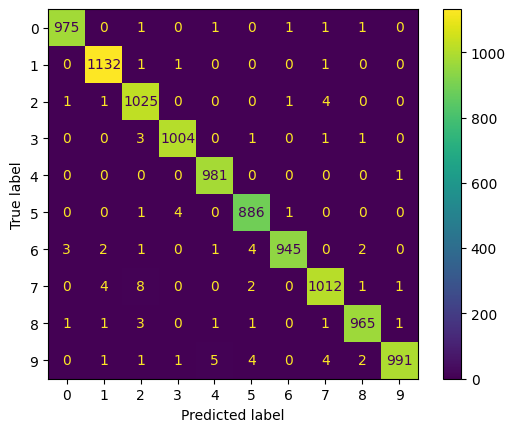

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, ypred_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000




Save above model for future use

In [40]:
model.save('Digit_Model.keras')